<a href="https://colab.research.google.com/github/V-Meenakshi/OptionChainProject/blob/main/optionChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the CSV File

In [24]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/MW-FO-nifty_bank_opt-02-Nov-2024.csv')
print(data.head())

  INSTRUMENT TYPE \n  SYMBOL \n EXPIRY DATE \n OPTION TYPE \n  STRIKE \n  \
0      Index Options  BANKNIFTY    06-Nov-2024           Call  51,700.00   
1      Index Options  BANKNIFTY    06-Nov-2024            Put  51,700.00   
2      Index Options  BANKNIFTY    06-Nov-2024           Call  52,000.00   
3      Index Options  BANKNIFTY    06-Nov-2024           Call  51,800.00   
4      Index Options  BANKNIFTY    06-Nov-2024           Call  53,000.00   

   LTP \n CHNG \n %CHNG \n OPEN \n HIGH \n  LOW \n VOLUME \n(Contracts)  \
0  393.65  -61.80   -13.57  455.55  510.00  389.00             3,99,242   
1  524.80  -10.05    -1.88  534.85  534.85  451.50             3,35,743   
2  266.00  -58.55   -18.04  334.95  367.95  266.00             3,30,561   
3  354.00  -55.25   -13.50  370.00  460.00  344.70             3,13,947   
4   47.10  -27.25   -36.65   75.00   87.45   47.10             2,89,536   

  VALUE \n (₹ Crores) OPEN INTEREST \n UNDERLYING VALUE \n  
0              271.95          



*   Remove any extra whitespace or newline characters in column names

*   This was generated with help of the ChatGPT







In [25]:
print("Column names before cleaning:")
print(data.columns)

# Remove any extra whitespace or newline characters in column names
data.columns = data.columns.str.strip().str.replace('\n', '').str.replace('\\', '').str.strip()
print("Column names after cleaning:")
print(data.columns)

Column names before cleaning:
Index(['INSTRUMENT TYPE \n', 'SYMBOL \n', 'EXPIRY DATE \n', 'OPTION TYPE \n',
       'STRIKE \n', 'LTP \n', 'CHNG \n', '%CHNG \n', 'OPEN \n', 'HIGH \n',
       'LOW \n', 'VOLUME \n(Contracts)', 'VALUE \n (₹ Crores)',
       'OPEN INTEREST \n', 'UNDERLYING VALUE \n'],
      dtype='object')
Column names after cleaning:
Index(['INSTRUMENT TYPE', 'SYMBOL', 'EXPIRY DATE', 'OPTION TYPE', 'STRIKE',
       'LTP', 'CHNG', '%CHNG', 'OPEN', 'HIGH', 'LOW', 'VOLUME (Contracts)',
       'VALUE  (₹ Crores)', 'OPEN INTEREST', 'UNDERLYING VALUE'],
      dtype='object')


Rest of your code to create option_chain with the help of chatGPT and Logical Understanding of the data

In [26]:
expiry_date_column = next((col for col in data.columns if 'EXPIRY' in col.upper()), None)

if expiry_date_column is None:
    raise ValueError("Expiry date column not found in the DataFrame")

# Filter for a specific expiry date (e.g., '06-Nov-2024')
expiry_date = '06-Nov-2024'
# Use the correct expiry date column name in the filter
filtered_data = data[data[expiry_date_column] == expiry_date]

print(f"Data for expiry date {expiry_date}:")
print(filtered_data.head())

Data for expiry date 06-Nov-2024:
  INSTRUMENT TYPE     SYMBOL  EXPIRY DATE OPTION TYPE     STRIKE     LTP  \
0   Index Options  BANKNIFTY  06-Nov-2024        Call  51,700.00  393.65   
1   Index Options  BANKNIFTY  06-Nov-2024         Put  51,700.00  524.80   
2   Index Options  BANKNIFTY  06-Nov-2024        Call  52,000.00  266.00   
3   Index Options  BANKNIFTY  06-Nov-2024        Call  51,800.00  354.00   
4   Index Options  BANKNIFTY  06-Nov-2024        Call  53,000.00   47.10   

     CHNG   %CHNG    OPEN    HIGH     LOW VOLUME (Contracts)  \
0  -61.80  -13.57  455.55  510.00  389.00           3,99,242   
1  -10.05   -1.88  534.85  534.85  451.50           3,35,743   
2  -58.55  -18.04  334.95  367.95  266.00           3,30,561   
3  -55.25  -13.50  370.00  460.00  344.70           3,13,947   
4  -27.25  -36.65   75.00   87.45   47.10           2,89,536   

  VALUE  (₹ Crores) OPEN INTEREST UNDERLYING VALUE  
0            271.95        40,280        51,673.90  
1            252.3

Separate data for CALL and PUT options

In [27]:

# Separate data for CALL and PUT options
calls_data = filtered_data[filtered_data['OPTION TYPE'] == 'Call']
puts_data = filtered_data[filtered_data['OPTION TYPE'] == 'Put']

print("Calls Data:")
print(calls_data.head())

print("Puts Data:")
print(puts_data.head())

Calls Data:
  INSTRUMENT TYPE     SYMBOL  EXPIRY DATE OPTION TYPE     STRIKE     LTP  \
0   Index Options  BANKNIFTY  06-Nov-2024        Call  51,700.00  393.65   
2   Index Options  BANKNIFTY  06-Nov-2024        Call  52,000.00  266.00   
3   Index Options  BANKNIFTY  06-Nov-2024        Call  51,800.00  354.00   
4   Index Options  BANKNIFTY  06-Nov-2024        Call  53,000.00   47.10   
5   Index Options  BANKNIFTY  06-Nov-2024        Call  52,500.00  121.05   

     CHNG   %CHNG    OPEN    HIGH     LOW VOLUME (Contracts)  \
0  -61.80  -13.57  455.55  510.00  389.00           3,99,242   
2  -58.55  -18.04  334.95  367.95  266.00           3,30,561   
3  -55.25  -13.50  370.00  460.00  344.70           3,13,947   
4  -27.25  -36.65   75.00   87.45   47.10           2,89,536   
5  -41.90  -25.71  171.00  188.70  120.00           2,61,812   

  VALUE  (₹ Crores) OPEN INTEREST UNDERLYING VALUE  
0            271.95        40,280        51,673.90  
2            157.69      1,35,262       

Find the maximum LTP for each strike price for CALLs and PUTs

In [28]:
highest_bid_pe = puts_data.groupby('STRIKE')['LTP'].max().reset_index()
highest_ask_ce = calls_data.groupby('STRIKE')['LTP'].max().reset_index()

# Rename columns for clarity
highest_bid_pe.columns = ['strike_price', 'highest_bid_price']
highest_ask_ce.columns = ['strike_price', 'highest_ask_price']

print("Highest bid prices for Put options:")
print(highest_bid_pe)

print("Highest ask prices for Call options:")
print(highest_ask_ce)

Highest bid prices for Put options:
    strike_price highest_bid_price
0      43,000.00              1.30
1      43,500.00              1.50
2      44,000.00              1.65
3      44,500.00              1.85
4      45,000.00              2.00
..           ...               ...
99     58,500.00          6,950.50
100    59,000.00          7,360.60
101    59,500.00                 -
102    60,000.00          8,160.00
103    60,500.00          8,848.55

[104 rows x 2 columns]
Highest ask prices for Call options:
    strike_price highest_ask_price
0      43,000.00          8,813.30
1      43,500.00                 -
2      44,000.00                 -
3      44,500.00                 -
4      45,000.00          6,600.00
..           ...               ...
99     58,500.00              2.30
100    59,000.00              2.05
101    59,500.00              2.20
102    60,000.00              2.05
103    60,500.00              2.20

[104 rows x 2 columns]


PART-1 **Write the overall code in the get_option_chain_data** **function**

In [29]:
import pandas as pd

def get_option_chain_data(file_path: str, expiry_date: str, instrument_name: str) -> pd.DataFrame:
    """
    Retrieves option chain data from a CSV file and processes it to get the highest LTP for PEs
    and highest LTP for CEs for each strike price.

    Parameters:
    - file_path: The path to the CSV file containing options data.
    - expiry_date: The expiry date to filter the options data.
    - instrument_name: Name of the instrument (e.g., "NIFTY" or "BANKNIFTY").

    Returns:
    - DataFrame with columns: ['instrument_name', 'strike_price', 'side', 'ltp']
    """

    # Load the CSV file
    data = pd.read_csv(file_path)

    # Clean column names
    data.columns = data.columns.str.strip().str.replace('\n', '').str.replace('\\', '').str.strip()

    # Identify the expiry date column
    expiry_date_column = next((col for col in data.columns if 'EXPIRY' in col.upper()), None)
    if expiry_date_column is None:
        raise ValueError("Expiry date column not found in the DataFrame")

    # Filter for the specified expiry date
    filtered_data = data[data[expiry_date_column] == expiry_date]

    # Separate data for CALL and PUT options
    calls_data = filtered_data[filtered_data['OPTION TYPE'] == 'Call']
    puts_data = filtered_data[filtered_data['OPTION TYPE'] == 'Put']

    # Use 'LTP' as the price indicator since BID and ASK are not available
    highest_ltp_pe = puts_data.groupby('STRIKE')['LTP'].max().reset_index()
    highest_ltp_pe['side'] = 'PE'
    highest_ltp_pe.rename(columns={'LTP': 'ltp'}, inplace=True)

    highest_ltp_ce = calls_data.groupby('STRIKE')['LTP'].max().reset_index()
    highest_ltp_ce['side'] = 'CE'
    highest_ltp_ce.rename(columns={'LTP': 'ltp'}, inplace=True)

    # Add instrument name
    highest_ltp_pe['instrument_name'] = instrument_name
    highest_ltp_ce['instrument_name'] = instrument_name

    # Rename strike price column for consistency
    highest_ltp_pe.rename(columns={'STRIKE': 'strike_price'}, inplace=True)
    highest_ltp_ce.rename(columns={'STRIKE': 'strike_price'}, inplace=True)

    # Concatenate call and put data into a single DataFrame
    option_chain_data = pd.concat([highest_ltp_pe, highest_ltp_ce], ignore_index=True)

    # Organize the DataFrame to have the correct column order
    option_chain_data = option_chain_data[['instrument_name', 'strike_price', 'side', 'ltp']]

    return option_chain_data

# Example usage
file_path = '/content/MW-FO-nifty_bank_opt-02-Nov-2024.csv'
expiry_date = '06-Nov-2024'
instrument_name = 'NIFTY'

# Call the function to get option chain data
option_chain_data = get_option_chain_data(file_path, expiry_date, instrument_name)

# Print the result
print(option_chain_data)


    instrument_name strike_price side   ltp
0             NIFTY    43,000.00   PE  1.30
1             NIFTY    43,500.00   PE  1.50
2             NIFTY    44,000.00   PE  1.65
3             NIFTY    44,500.00   PE  1.85
4             NIFTY    45,000.00   PE  2.00
..              ...          ...  ...   ...
203           NIFTY    58,500.00   CE  2.30
204           NIFTY    59,000.00   CE  2.05
205           NIFTY    59,500.00   CE  2.20
206           NIFTY    60,000.00   CE  2.05
207           NIFTY    60,500.00   CE  2.20

[208 rows x 4 columns]


Visualization for the part 1 code that is for the highest bid price
for put options (PE) or the highest ask price for call options (CE) for each strike price.

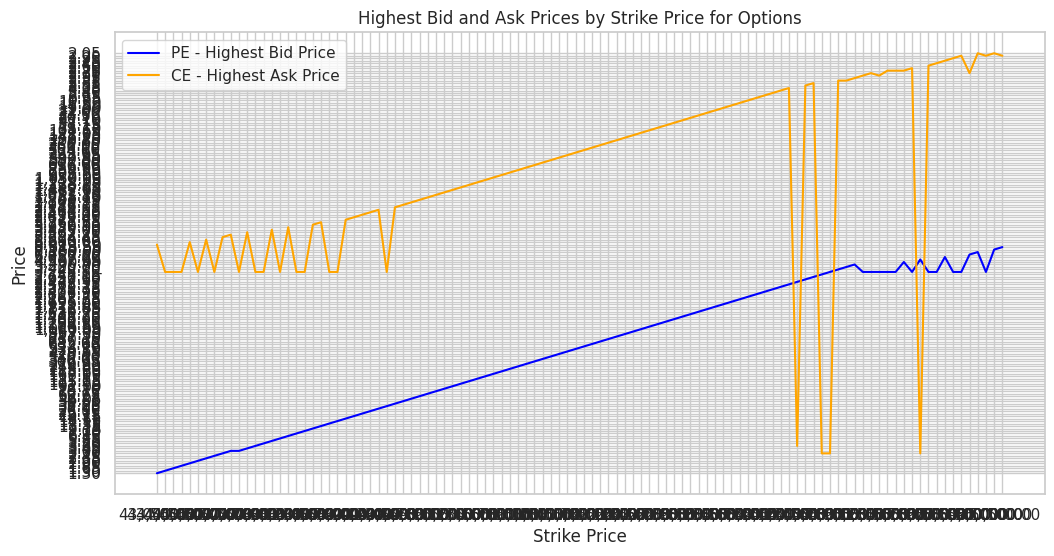

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(highest_bid_pe['strike_price'], highest_bid_pe['highest_bid_price'], label='PE - Highest Bid Price', color='blue')
plt.plot(highest_ask_ce['strike_price'], highest_ask_ce['highest_ask_price'], label='CE - Highest Ask Price', color='orange')

# Labels and title
plt.xlabel('Strike Price')
plt.ylabel('Price')
plt.title('Highest Bid and Ask Prices by Strike Price for Options')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-31-3ce90630f1ae>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_chain_data['strike_price'] = option_chain_data['strike_price'].astype(int)


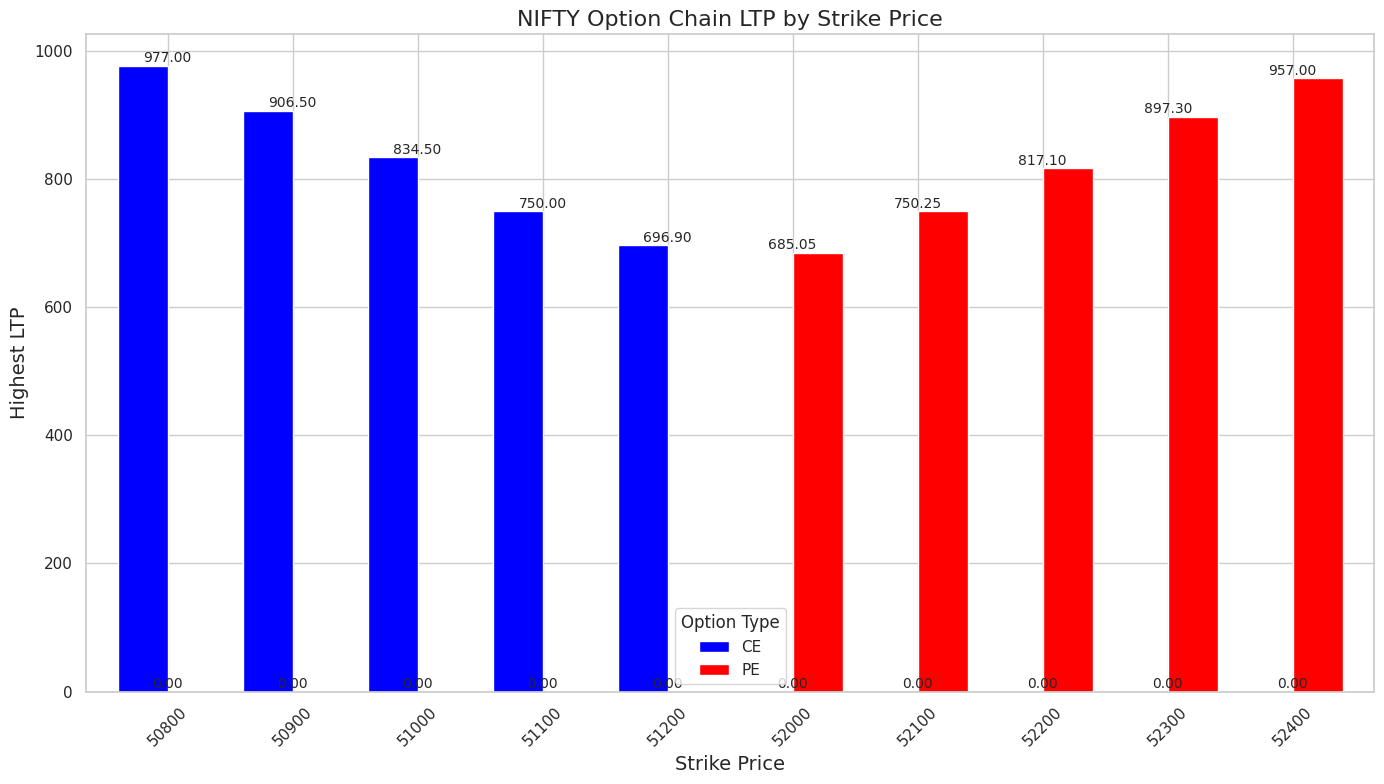

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_option_chain(option_chain_data: pd.DataFrame, top_n: int = None):
    """
    Plots the option chain data with grouped bars for Calls (CE) and Puts (PE) across strike prices.

    Parameters:
    - option_chain_data: DataFrame containing option chain data with columns:
      ['instrument_name', 'strike_price', 'side', 'ltp']
    - top_n: Optional, the top N strike prices by highest LTP to display.
    """
    # Convert 'ltp' to numeric, handling errors
    option_chain_data['ltp'] = pd.to_numeric(option_chain_data['ltp'], errors='coerce')

    # Remove commas from 'strike_price' and convert to numeric
    option_chain_data['strike_price'] = (
        option_chain_data['strike_price'].replace(',', '', regex=True).astype(float)
    )

    # Drop any rows with NaN in 'ltp' or 'strike_price' columns
    option_chain_data = option_chain_data.dropna(subset=['ltp', 'strike_price'])

    # Convert 'strike_price' to integer for better sorting in the plot
    option_chain_data['strike_price'] = option_chain_data['strike_price'].astype(int)

    # Sort by highest LTP and filter for top N strike prices if specified
    if top_n:
        option_chain_data = option_chain_data.nlargest(top_n, 'ltp')

    # Pivot the data for better plotting format
    option_chain_pivot = option_chain_data.pivot(index='strike_price', columns='side', values='ltp').fillna(0)

    # Set up the figure
    plt.figure(figsize=(14, 8))

    # Plot grouped bar chart
    option_chain_pivot.plot(kind='bar', color={'CE': 'blue', 'PE': 'red'}, width=0.8, ax=plt.gca())

    # Adding value labels to each bar
    for side in option_chain_pivot.columns:
        for idx, value in enumerate(option_chain_pivot[side]):
            plt.text(idx, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Add title and labels
    plt.title(f"{option_chain_data['instrument_name'].iloc[0]} Option Chain LTP by Strike Price", fontsize=16)
    plt.xlabel("Strike Price", fontsize=14)
    plt.ylabel("Highest LTP", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Option Type")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Assuming 'option_chain_data' DataFrame is obtained from the previous function
plot_option_chain(option_chain_data, top_n=10)


PART-2: this is code for the takes the DataFrame from Part 1 and calculates two
additional columns:  margin_required  and  premium_earned  .

In [32]:
import pandas as pd
import numpy as np

# Load the CSV file and define the previous function
def get_option_chain_data(file_path: str, expiry_date: str, instrument_name: str) -> pd.DataFrame:
    """
    Retrieves option chain data from a CSV file and processes it to get the highest LTP for PEs
    and highest LTP for CEs for each strike price.
    """
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip().str.replace('\n', '').str.replace('\\', '').str.strip()
    expiry_date_column = next((col for col in data.columns if 'EXPIRY' in col.upper()), None)
    if expiry_date_column is None:
        raise ValueError("Expiry date column not found in the DataFrame")

    filtered_data = data[data[expiry_date_column] == expiry_date]
    calls_data = filtered_data[filtered_data['OPTION TYPE'] == 'Call']
    puts_data = filtered_data[filtered_data['OPTION TYPE'] == 'Put']

    highest_bid_pe = puts_data.groupby('STRIKE')['LTP'].max().reset_index()
    highest_bid_pe['side'] = 'PE'
    highest_bid_pe.rename(columns={'LTP': 'bid/ask'}, inplace=True)

    highest_ask_ce = calls_data.groupby('STRIKE')['LTP'].max().reset_index()
    highest_ask_ce['side'] = 'CE'
    highest_ask_ce.rename(columns={'LTP': 'bid/ask'}, inplace=True)

    highest_bid_pe['instrument_name'] = instrument_name
    highest_ask_ce['instrument_name'] = instrument_name

    highest_bid_pe.rename(columns={'STRIKE': 'strike_price'}, inplace=True)
    highest_ask_ce.rename(columns={'STRIKE': 'strike_price'}, inplace=True)

    option_chain_data = pd.concat([highest_bid_pe, highest_ask_ce], ignore_index=True)
    option_chain_data = option_chain_data[['instrument_name', 'strike_price', 'side', 'bid/ask']]

    return option_chain_data

# Placeholder function to simulate margin API call
def get_margin_from_api(transaction_type: str, strike_price: float) -> float:
    return 1950  # Example margin value

def calculate_margin_and_premium(data: pd.DataFrame, lot_size: int = 120) -> pd.DataFrame:
    """
    Calculates the margin required and premium earned for each option contract in the DataFrame.
    """
    data['margin_required'] = data.apply(
        lambda row: get_margin_from_api(transaction_type="Sell", strike_price=row['strike_price']),
        axis=1
    )

    # Clean the 'bid/ask' column: Remove commas, replace non-numeric with NaN, and convert to float
    data['bid/ask'] = data['bid/ask'].replace({',': '', '−': np.nan, '-': np.nan}, regex=True)  # Handle special characters
    data['bid/ask'] = pd.to_numeric(data['bid/ask'], errors='coerce')  # Convert to float, set errors to NaN

    # Drop rows with NaN in 'bid/ask' if necessary
    data = data.dropna(subset=['bid/ask'])

    # Use .loc to avoid SettingWithCopyWarning
    data.loc[:, 'premium_earned'] = data['bid/ask'] * lot_size

    return data

# Define file path and parameters
file_path = '/content/MW-FO-nifty_bank_opt-02-Nov-2024.csv'
expiry_date = '06-Nov-2024'
instrument_name = 'NIFTY'

# Load data from CSV and calculate margin and premium
option_chain_data = get_option_chain_data(file_path, expiry_date, instrument_name)
result = calculate_margin_and_premium(option_chain_data)

# Print the result
print(result)


    instrument_name strike_price side  bid/ask  margin_required  \
0             NIFTY    43,000.00   PE     1.30             1950   
1             NIFTY    43,500.00   PE     1.50             1950   
2             NIFTY    44,000.00   PE     1.65             1950   
3             NIFTY    44,500.00   PE     1.85             1950   
4             NIFTY    45,000.00   PE     2.00             1950   
..              ...          ...  ...      ...              ...   
203           NIFTY    58,500.00   CE     2.30             1950   
204           NIFTY    59,000.00   CE     2.05             1950   
205           NIFTY    59,500.00   CE     2.20             1950   
206           NIFTY    60,000.00   CE     2.05             1950   
207           NIFTY    60,500.00   CE     2.20             1950   

     premium_earned  
0             156.0  
1             180.0  
2             198.0  
3             222.0  
4             240.0  
..              ...  
203           276.0  
204           246.0

<ipython-input-32-4bd702ce97a7>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['margin_required'] = data.apply(
<ipython-input-32-4bd702ce97a7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bid/ask'] = data['bid/ask'].replace({',': '', '−': np.nan, '-': np.nan}, regex=True)  # Handle special characters
<ipython-input-32-4bd702ce97a7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Visualization for the margin_required and premium_earned .

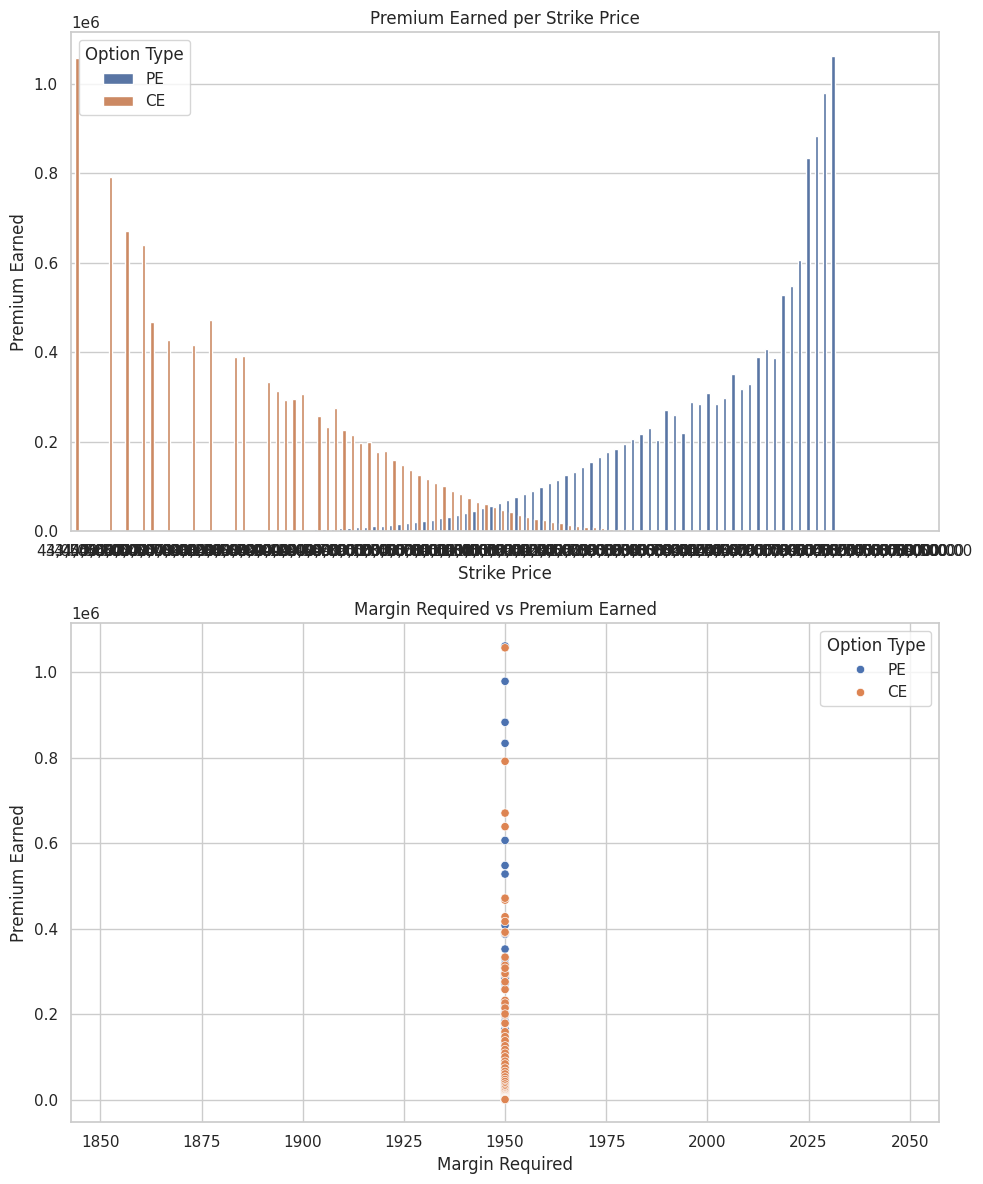

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_option_data(data: pd.DataFrame):
    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))

    # Bar chart for Premium Earned per Strike Price
    sns.barplot(ax=axes[0], x='strike_price', y='premium_earned', hue='side', data=data)
    axes[0].set_title('Premium Earned per Strike Price')
    axes[0].set_xlabel('Strike Price')
    axes[0].set_ylabel('Premium Earned')
    axes[0].legend(title='Option Type')

    # Scatter plot for Margin Required vs Premium Earned
    sns.scatterplot(ax=axes[1], x='margin_required', y='premium_earned', hue='side', data=data)
    axes[1].set_title('Margin Required vs Premium Earned')
    axes[1].set_xlabel('Margin Required')
    axes[1].set_ylabel('Premium Earned')
    axes[1].legend(title='Option Type')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Assuming 'result' is the DataFrame obtained from the previous calculations
plot_option_data(result)
